<a href="https://colab.research.google.com/github/mishraraaj/Android_Apps_Analysis/blob/main/raj_mishra_Team_2_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Nowadays every single day there are a tremendous amount of ideas related to creating a new app comes to the mind of every single individual, with tools and application helping in the creation of mobile apps it is even easy to implement those ideas. So how this data can help anyone in detecting the target factors responsible for app engagement and success. 
Before jumping to any kind of conclusions we have to

1.<b> Understand </b> the Problem.
Understand dependent variables, for the given problem.

2.Derive the correlation btw the features whether they are correlated or independent.

See the effect of features on the dependent variable, 
And Conclude, and then Test the conclusion on the given data.

In [341]:
%matplotlib inline

In [342]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [343]:
import pandas as pd
import numpy as np
import re

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
playstore_df=pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/googleplaystore.csv')
users_df=pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/googleplaystore_user_reviews.csv')

In [346]:
users_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [347]:
users_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [348]:
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

So, from this given data if we have to conclude the success of app the better measure for that would be the No of Installs of any application, 

Not just that we also have to consider the user ratings, because for mot of the creators the user experience matters the most. 



Apart from it we will analyze which Category has higher no of users, who are willingly paying for the service and we will analyze category wise w hich are the category with most positive user experience 

 

In [349]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So Genrally People are rating 4+ Rewiews in All the categeories so it will not give much idea wheather any categeory affects users ratings or not

#2 Cleaning the data
i.e the column containing those values which are not required ,and replacing not required charaters

This row Contains Mostly Random Values So we will not Consider this because it is not efficient to fill all the values

In [350]:
playstore_df["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [351]:
playstore_df['Installs'] = playstore_df['Installs'] .map(lambda x: re.sub(r'\W+', '', x))

In [352]:
playstore_df[playstore_df['Installs'].str.contains('[A-Za-z]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [353]:
playstore_df.drop(playstore_df.index[10472],inplace=True)
playstore_df=playstore_df.reindex(range(len(playstore_df)))


In [354]:
playstore_df['Installs']=playstore_df['Installs'].astype(float)

In [355]:
playstore_df['Reviews']=playstore_df['Reviews'].astype(float)

In [356]:
playstore_df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10835                  9.6M
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
Name: Size, Length: 10840, dtype: object

In [357]:
playstore_df['Size']= playstore_df['Size'].replace("Varies with device",np.nan)
playstore_df['Size']=playstore_df['Size'].str.replace("M","000000")             # 1024*1024 Bytes =1 Mb
playstore_df['Size']= playstore_df['Size'].str.replace("k","000")               # 1024 Bytes= 1 Kb
playstore_df['Size'] =playstore_df['Size'].astype(float)

In [358]:
playstore_df['Price'] = playstore_df['Price'].astype(str)
playstore_df['Price'] = playstore_df['Price'].map(lambda x: x.lstrip('$').rstrip())


In [359]:
playstore_df['Size'][playstore_df['Size']<1000]

2        8.7
4        2.8
5        5.6
9        3.1
15       2.7
        ... 
10831    9.8
10834    2.6
10835    9.6
10837    3.6
10838    9.5
Name: Size, Length: 3609, dtype: float64

In [360]:
len(playstore_df['Size'][playstore_df['Size'].isna()])


1696

In [361]:
playstore_df[playstore_df['Size'].isna()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,NaN,5000000.0,Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,NaN,10000000.0,Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,NaN,1000000.0,Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,NaN,5000000.0,Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,NaN,100000.0,Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471.0,NaN,100000.0,Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8.0,NaN,1000.0,Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622.0,NaN,100000.0,Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,NaN,5000000.0,Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [362]:
playstore_df[(playstore_df['Installs']>=100000000.0) & (playstore_df['Rating']>4.5)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,NaN,100000000.0,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237.0,NaN,500000000.0,Free,0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924.0,NaN,100000000.0,Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
784,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507.0,NaN,100000000.0,Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
799,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507.0,NaN,100000000.0,Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,CM Locker - Security Lockscreen,TOOLS,4.6,3090680.0,NaN,100000000.0,Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
7808,CamScanner - Phone PDF Creator,PRODUCTIVITY,4.6,1502622.0,NaN,100000000.0,Free,0,Everyone,Productivity,"July 3, 2018",Varies with device,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850.0,88000000.0,100000000.0,Free,0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8439,Duolingo: Learn Languages Free,FAMILY,4.7,6297590.0,NaN,100000000.0,Free,0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device


It seems There are duplicates in data , We have to remove them as well ,Duplicacy can cause data redundancy 

In [363]:
users_df=users_df.drop_duplicates().reindex()

In [364]:
playstore_df=playstore_df.drop_duplicates(subset='App').reindex()

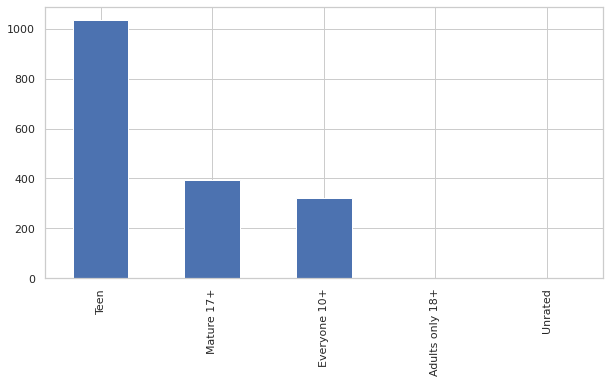

In [365]:
plt.figure(figsize=(10,5))
playstore_df['Content Rating'][playstore_df['Content Rating']!='Everyone'].value_counts().plot(kind='bar',grid=True)

In [366]:
playstore_df['Last Updated']= pd.to_datetime(playstore_df['Last Updated'])

In [367]:
categories_installs=playstore_df.groupby(by='Category')["Installs"].mean()

In [368]:
categories_installs=categories_installs.sort_values()

There Are 33 categories In which

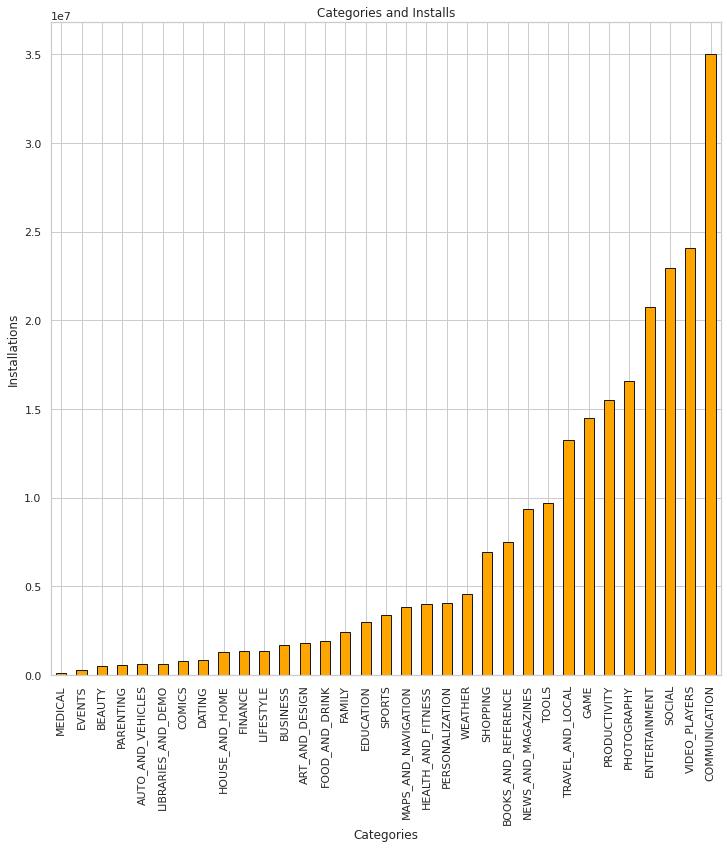

In [369]:
plt.figure(figsize=(12,12))
categories_installs.plot(kind='bar',grid=True,facecolor='orange', edgecolor='k')
plt.xlabel("Categories")
plt.ylabel("Installations")
plt.title("Categories and Installs")
plt.show()

In [370]:
categories_installs[-3:]     # top 3 categeories 

Category
SOCIAL           2.296179e+07
VIDEO_PLAYERS    2.409143e+07
COMMUNICATION    3.504215e+07
Name: Installs, dtype: float64

From This we can conclude that The VIDEO_PLAYERS,SOCIAL,COMMUNICATION 
Are the highest installed categeories  

In [371]:
Category_review_ratings=playstore_df.groupby(by="Category")[["Rating","Reviews","Installs"]].mean().reset_index()

Category_review_ratings["Total_Rating"]=Category_review_ratings["Rating"]*Category_review_ratings["Reviews"]

In [372]:
Category_review_ratings

,Category,Rating,Reviews,Installs,Total_Rating
0,ART_AND_DESIGN,4.357377,22175.046875,1.786533e+06,9.662504e+04
1,AUTO_AND_VEHICLES,4.190411,13690.188235,6.250613e+05,5.736751e+04
2,BEAUTY,4.278571,7476.226415,5.131519e+05,3.198757e+04
3,BOOKS_AND_REFERENCE,4.344970,75321.234234,7.504367e+06,3.272685e+05
4,BUSINESS,4.098479,23548.202381,1.659916e+06,9.651182e+04
5,COMICS,4.181481,41822.696429,8.032348e+05,1.748808e+05
6,COMMUNICATION,4.121484,907337.676190,3.504215e+07,3.739578e+06
7,DATING,3.970149,21190.315789,8.241293e+05,8.412872e+04
8,EDUCATION,4.364407,112303.764706,2.965983e+06,4.901393e+05
9,ENTERTAINMENT,4.135294,340810.294118,2.072216e+07,1.409351e+06


In [373]:
Category_review_ratings.set_index("Category",inplace=True)

In [374]:
Category_review_ratings=Category_review_ratings

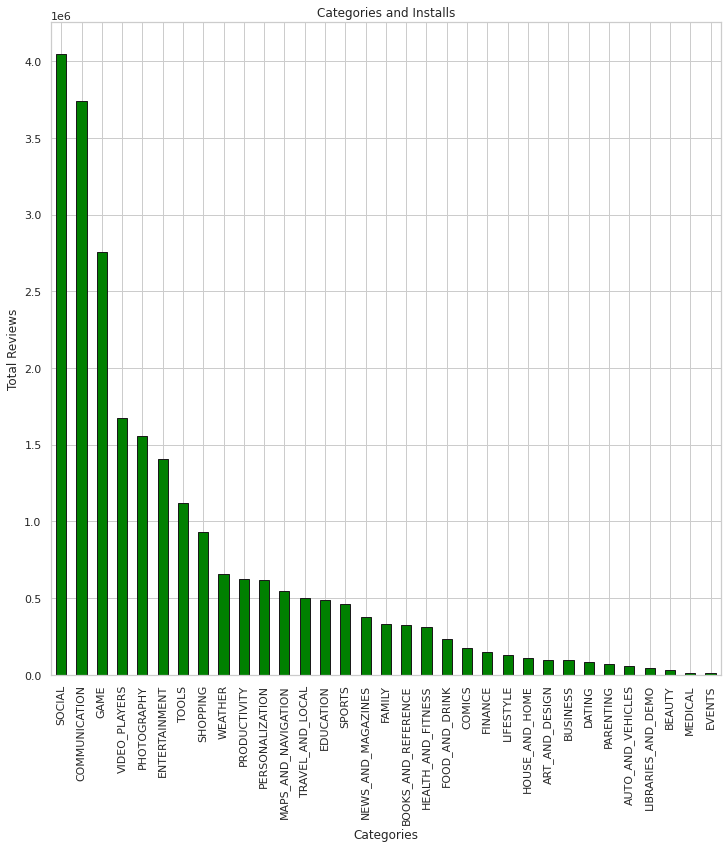

In [375]:

plt.figure(figsize=(12,12))
Category_review_ratings['Total_Rating'].sort_values(ascending=False).plot(kind="bar",facecolor='green', edgecolor='k',width=0.5)
plt.xlabel("Categories")
plt.ylabel("Total Reviews")
plt.title("Categories and Installs")
plt.show()

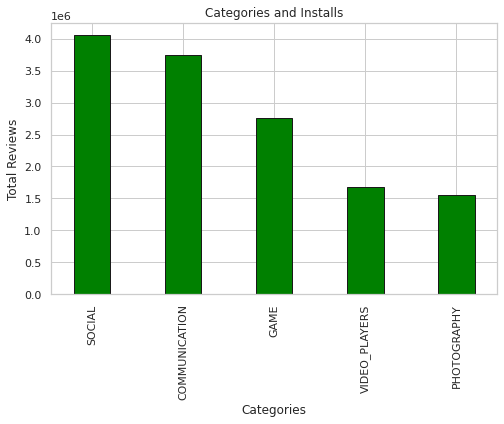

In [376]:
 
plt.figure(figsize=(8,5))
Category_review_ratings['Total_Rating'].sort_values(ascending=False)[:5].plot(kind="bar",facecolor='green', edgecolor='k',width=0.4)
plt.xlabel("Categories")
plt.ylabel("Total Reviews")
plt.title("Categories and Installs")
plt.show()

The Top 5 categeroies

In [377]:
playstore_df['Price']=playstore_df['Price'].astype(float)

In [378]:
playstore_df.loc[:,['Genres','Price']][playstore_df['Price']>0].groupby(by='Genres').mean()

,Price
Genres,
Action,3.469167
Action;Action & Adventure,2.990000
Adventure,4.490000
Adventure;Action & Adventure,4.990000
Adventure;Brain Games,2.990000
...,...
Strategy;Action & Adventure,3.990000
Tools,3.426282
Travel & Local,4.162500


In [379]:
corelation_apps=playstore_df[['Rating',	'Reviews',	'Size',	'Installs']].corr()

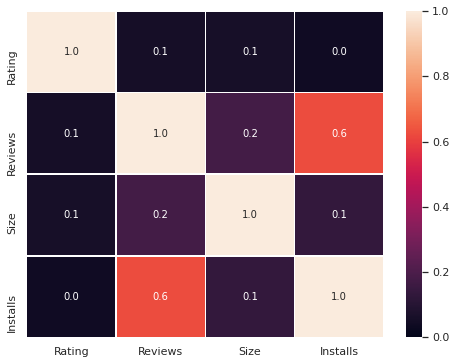

In [380]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corelation_apps, annot=True, linewidths=.5, fmt= '.1f',ax=ax, vmin=0)
plt.show()

This shows The positive corelation between the the no of reviews and the no of install , so if there are high reach of any application and people give review for some application that contributes into increasing the no of install

4.3
4.1732031726662635


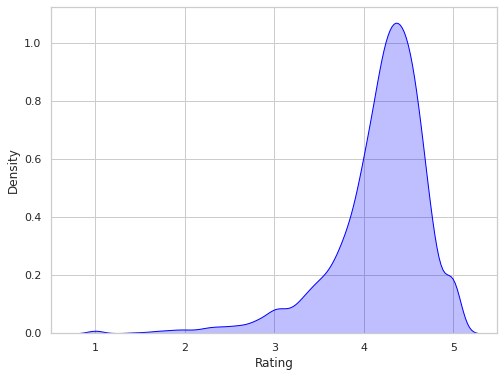

In [381]:
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(8, 6))
Ratings_of_apps=playstore_df['Rating'].dropna()
sns.kdeplot(shade=True,data=Ratings_of_apps,color='blue')
print(np.median(Ratings_of_apps))
print(np.mean(Ratings_of_apps))

This shows That the Ratings have left Skewed value with median 4.3 And mean 4.1732031726662635 mean < median

12000000.0
18370097.03289051


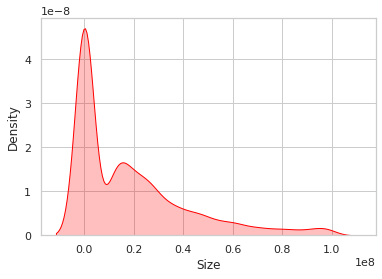

In [382]:
sns.set_theme(style="whitegrid")
sizes_of_apps=playstore_df['Size'].dropna()

sns.kdeplot(shade=True,data=sizes_of_apps,color='red')
print(np.median(sizes_of_apps))
print(np.mean(sizes_of_apps))
plt.rcParams['figure.figsize'] = (8,5)

The size of applications shows right skweed trend and it is dia modular most of apps are small in size and there are few outliers on the positive side

100000.0
7777276.612859805


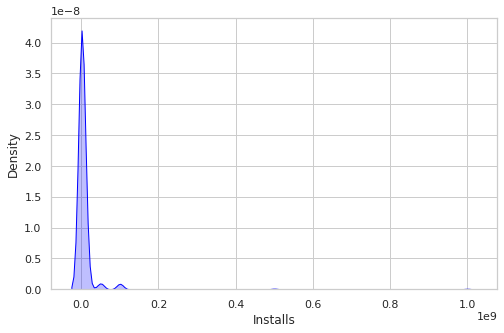

In [383]:
sns.set_theme(style="whitegrid")
Installs_of_apps=playstore_df['Installs'].dropna()
sns.kdeplot(shade=True,data=Installs_of_apps,color='blue')
print(np.median(Installs_of_apps))
print(np.mean(Installs_of_apps))

The ibstalls are right skewed very less appes hith high no of installs are threre

In [384]:
users_df=users_df.dropna()
corelation_subjectivity_polarity=users_df.corr()

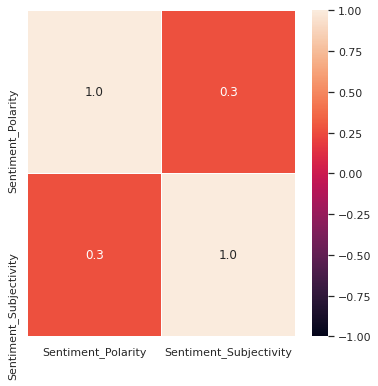

In [385]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corelation_subjectivity_polarity, annot=True, linewidths=.5, fmt= '.1f',ax=ax, vmin=-1)
plt.show()

It Shows somewhat positive correlation between sentiment polarity and sentiment subjectivity

In [386]:
users_df
users_df.pivot_table(index=['Translated_Review'], aggfunc='size')

Translated_Review
!!!Dont waste time! Failed Samsung flagship phone galaxy s8, Installed ,shows rotating circle internet download, keeps rotates forever proper progress indication; finally shows failed download. Stupid game developers. Go NFS working good.    1
"...Future Follow updated follow"...                                                                                                                                                                                                              1
"An error occurred while loading the search results. Please try again." And so it's already 2 days. The reinstallation did not help                                                                                                               1
"Cisco Spark stopped working" error group work. We 4 groups last days stopped working. Only seems issue Android devices Apple.                                                                                                                    1
"Class

In [387]:
app_info_df=playstore_df[['App','Category','Rating','Reviews','Size','Installs']]
	
combined_df=pd.merge(users_df,app_info_df)

combined_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0


Text(0.5, 0, 'Categeories')

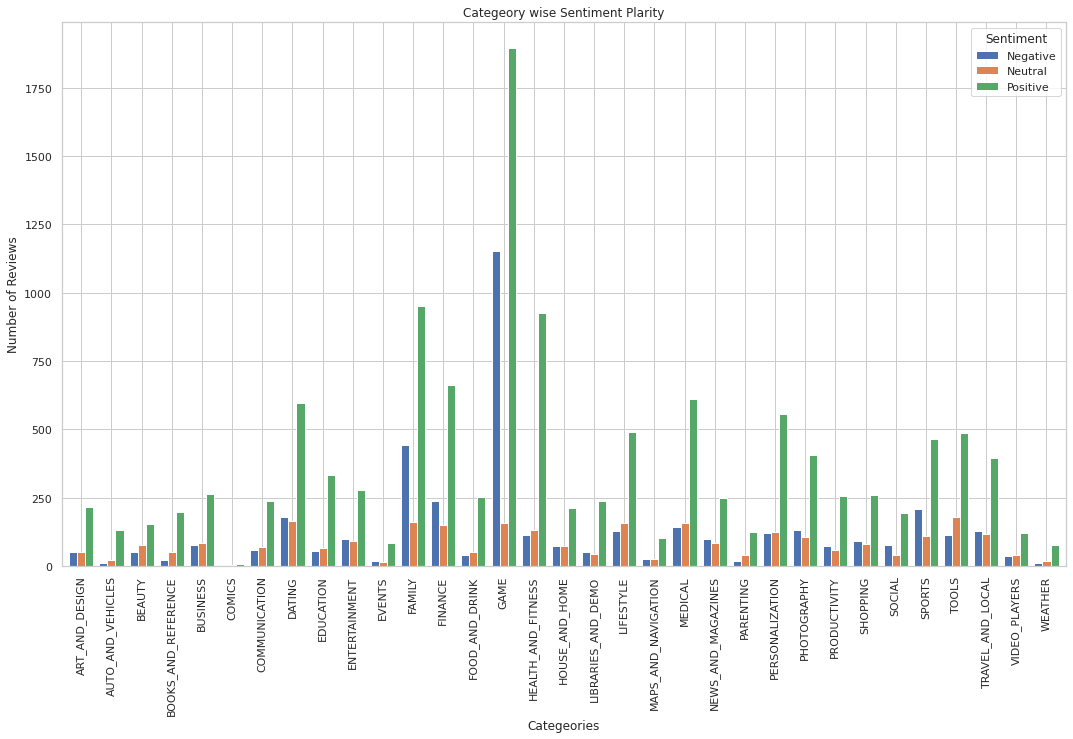

In [400]:
gr=combined_df.groupby(['Category','Sentiment'])['Sentiment_Polarity'].count().unstack()

gr.plot(kind='bar',width=0.8,figsize=(18, 10))
plt.title('Categeory wise Sentiment Plarity')
plt.ylabel('Number of Reviews')
plt.xlabel('Categeories')


In [389]:
combined_df=combined_df.dropna()

In [390]:
combined_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Reviews,Size,Installs
Sentiment_Polarity,1.000000,0.273182,0.101877,-0.087425,-0.154718,-0.070613
Sentiment_Subjectivity,0.273182,1.000000,0.074806,0.004013,0.009997,-0.002713
Rating,0.101877,0.074806,1.000000,0.155281,0.130300,0.044176
Reviews,-0.087425,0.004013,0.155281,1.000000,0.367566,0.399252
Size,-0.154718,0.009997,0.130300,0.367566,1.000000,0.206243
Installs,-0.070613,-0.002713,0.044176,0.399252,0.206243,1.000000


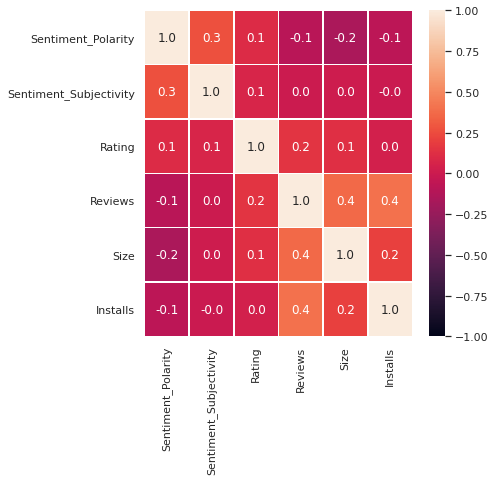

In [391]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(combined_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, vmin=-1)
plt.show()

The size of apps has some positive correlation with the reviews and installs

In [392]:
Category_review_ratings[['Installs',	'Total_Rating']].corr()

,Installs,Total_Rating
Installs,1.000000,0.868184
Total_Rating,0.868184,1.000000


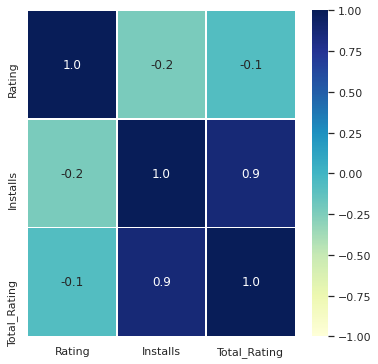

In [393]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(Category_review_ratings[['Rating','Installs','Total_Rating']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, vmin=-1,cmap="YlGnBu")
plt.show()

*From This We can conclude that using avg ratings and avg No of reviews product with in each categeory it shows high positive correlation , ie the reach of reviews can help in the no installs and hence in the success of any application*
This Shows that feature engennering we did makes sense since it shows positive corelation With installs so it can helps us in predicting the no of installs and so the Success of any app


In [394]:
cols_to_norm = ['Rating']
combined_df['new_ratings'] = combined_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

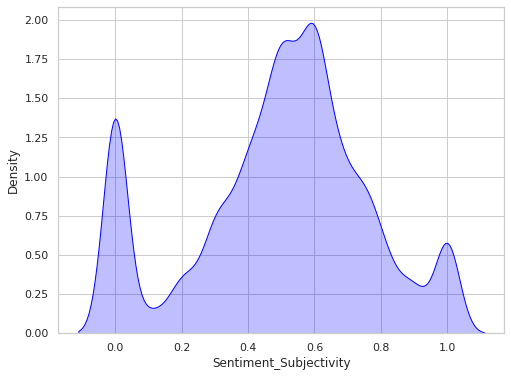

In [395]:
plt.subplots(figsize=(8, 6))
sns.kdeplot(shade=True,data=combined_df['Sentiment_Subjectivity'],color='blue')


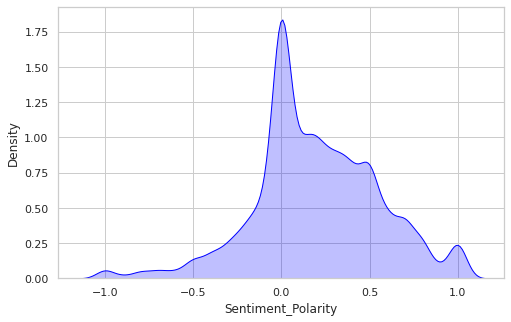

In [396]:

sns.kdeplot(shade=True,data=combined_df['Sentiment_Polarity'],color='blue')


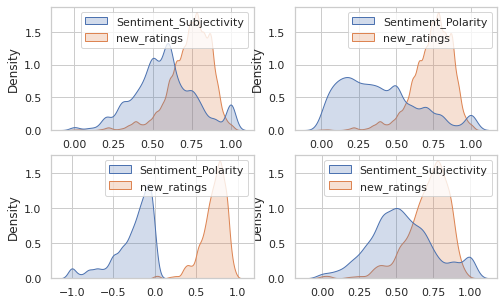

In [397]:
fig, ax = plt.subplots(2,2)

sns.kdeplot(shade=True,data=combined_df[['Sentiment_Subjectivity','new_ratings']][combined_df['Sentiment']=='Negative'],color='blue')
ax1=plt.subplot(2, 2, 1)
sns.kdeplot(shade=True,data=combined_df[['Sentiment_Subjectivity','new_ratings']][combined_df['Sentiment']=='Positive'],color='blue')
ax1=plt.subplot(2, 2, 2)
sns.kdeplot(shade=True,data=combined_df[['Sentiment_Polarity','new_ratings']][combined_df['Sentiment']=='Positive'],color='blue')
ax1=plt.subplot(2, 2, 3)
sns.kdeplot(shade=True,data=combined_df[['Sentiment_Polarity','new_ratings']][combined_df['Sentiment']=='Negative'],color='blue')


In [398]:
combined_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Reviews,Size,Installs,new_ratings
Sentiment_Polarity,1.000000,0.273182,0.101877,-0.087425,-0.154718,-0.070613,0.101877
Sentiment_Subjectivity,0.273182,1.000000,0.074806,0.004013,0.009997,-0.002713,0.074806
Rating,0.101877,0.074806,1.000000,0.155281,0.130300,0.044176,1.000000
Reviews,-0.087425,0.004013,0.155281,1.000000,0.367566,0.399252,0.155281
Size,-0.154718,0.009997,0.130300,0.367566,1.000000,0.206243,0.130300
Installs,-0.070613,-0.002713,0.044176,0.399252,0.206243,1.000000,0.044176
new_ratings,0.101877,0.074806,1.000000,0.155281,0.130300,0.044176,1.000000


Ratings Doesnt shows any correlation with Sentiment_Polarity or Sentiment_Subjectivity. Ratings can only be predicted bu using all the features given